理論的方式（範例1）

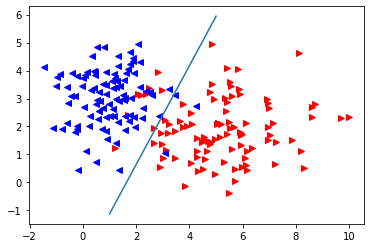

In [47]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], 'r>', label = 'Group A')
plt.plot(C2[:,0], C2[:,1],'b<', label = 'Group B')
# Estimatr the group parameters
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(1, 5, 10)
plt.plot(x, f(x))

套件方式LDA(範例1)

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/3723785199.py:35: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


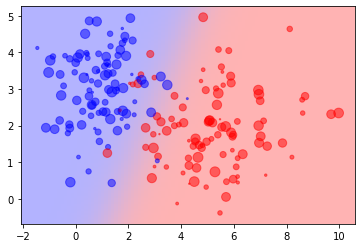

In [56]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小


nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])#ravel是把xx拉成一個向量,Lda.predict_proba為計算每一個點的後驗機率值且分成兩群
Z = Z[:, 1].reshape(xx.shape)#Z[:, 1]為第一群的後驗機率值
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)


### 套件方式QDA(範例1) ###

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/1021756505.py:33: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


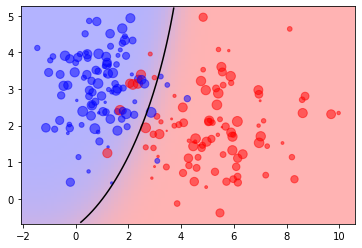

In [54]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)
contoursQDA = plt.contour(xx, yy, Z, [0.5],colors = 'k')

### LDA(範例2) ###

Training error for LDA =0.2700


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32184/3846350540.py:42: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32184/3846350540.py:43: UserWarning: The following kwargs were not used by contour: 'color'
  contoursLDA=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')


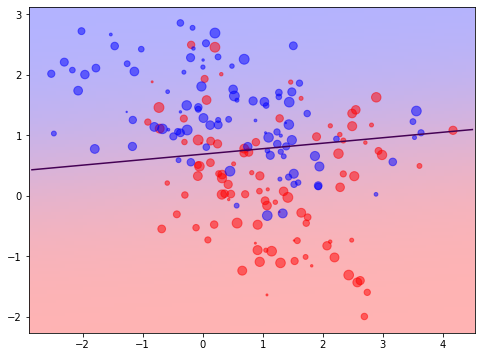

In [50]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(figsize=(8,6))
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小

Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))

nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z=Z[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
plt.pcolormesh(xx,yy,Z,cmap='red_blue_classes',shading='auto',zorder=0)
plt.cm.register_cmap(cmap = cmap)
contoursLDA=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-2, 4, 10)
plt.plot(x, f(x))



### QDA(範例2) ###

Training error for QDA =0.2850


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/1305272147.py:44: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


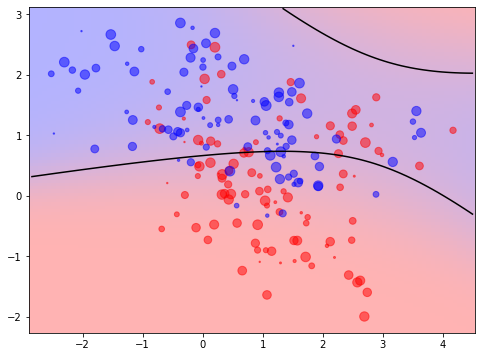

In [168]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(figsize=(8,6))
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小



# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
#Qda.means
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)
contoursQDA = plt.contour(xx, yy, Z, [0.5],colors = 'k')

In [150]:
def genmnlrvs(n1,n2,m1,m2,Cov1,Cov2): #生成資料的函數
    mvn1=multivariate_normal(mean=m1,cov=Cov1)
    mvn2=multivariate_normal(mean=m1,cov=Cov2)
    A,B=mvn1.rvs(n1),mvn2.rvs(n2)
    X=np.vstack((A,B))
    y=np.hstack((np.zeros(n1),np.ones(n2)))
    return X,y
# X,y=genmnlrvs(200,200,np.array([0, 0]), np.array([4, 1]),Cov1 = np.array([[1, 0], [0, 1]])\
#  ,Cov2 = np.array([[1, 0.2], [0.2, 1]])) 

In [ ]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt('/Users/liang/Documents/Github/la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]



### LDA/QDA 畫在同張圖 ###

Training error for LDA =0.2700
Training error for QDA =0.2850


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32184/1105612121.py:41: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32184/1105612121.py:42: UserWarning: The following kwargs were not used by contour: 'color'
  contoursLDA=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32184/1105612121.py:59: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


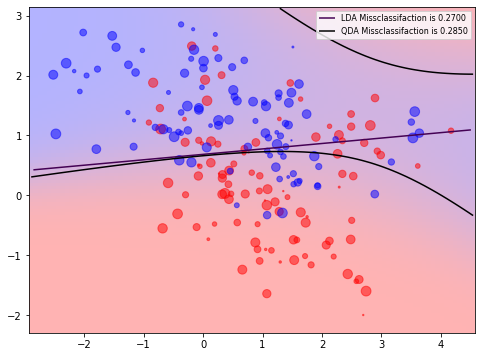

In [3]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(figsize=(8,6))
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z=Z[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
plt.pcolormesh(xx,yy,Z,cmap=cmap,shading='auto',zorder=0)
plt.cm.register_cmap(cmap = cmap)
contoursLDA=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')
#draw QDA
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
#Qda.means
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)
contoursQDA= plt.contour(xx, yy, Z, [0.5],colors = 'k')

h1,_=contoursLDA.legend_elements()
h2,_=contoursQDA.legend_elements()
plt.legend([h1[0],h2[0]],['LDA Missclassifaction is {:.4f}'.format(trainErrLDA),'QDA Missclassifaction is {:.4f}'.format(trainErrQDA)],fontsize=8)

Training error for QDA =0.0800


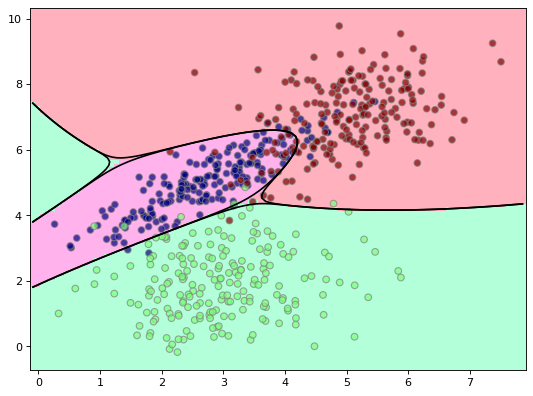

In [36]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
        
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data4.txt', comments='#')#讓第一列不要讀進去
# colors1 = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
# plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')

X=D[:,0:2]
y=D[:,2]
fig , ax =plt.subplots(dpi=80,figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='grey',cmap='jet',alpha=0.7)
# area=2*np.random.randint(50,size=D[:,0].size)
# grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
#         alpha = 0.5, marker = 'o' )#area代表點的的小
# Define pseudo colors#畫地板
# cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
#         'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
#         'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
# cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
#Qda.means
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
x1=xx.ravel()
x2=yy.ravel()
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)

contoursQDA0 = plt.contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = plt.contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = plt.contour(xx, yy, Z2, [0.5],colors = 'k')

cmap=plt.get_cmap('gist_rainbow_r')
zz=np.array([Qda.predict(np.array([[xx,yy]])) for xx,yy in zip(x1,x2)])
Z_=zz.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z_, cmap = cmap,\
    norm = colors.Normalize(0., 2.),\
    shading = 'auto', zorder = 0,alpha=0.3)

### 訓練資料(LDA) ###

In [165]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
#trainning data
Lda=LinearDiscriminantAnalysis()
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
# split data into TRAINing and TESTing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
Lda.fit(X_train, y_train)
Lda_trainingErr =1-Lda.score(X_train,y_train) 
print('LDA training Error:{:.4f}'.format(Lda_trainingErr))
#testing data
Lda_testingErr =1-Lda.score(X_test,y_test) 
print('LDA testing Error:{:.4f}'.format(Lda_testingErr))


LDA training Error:0.2562
LDA testing Error:0.3250


### 訓練資料(QDA) ###

In [169]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
#trainning data
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
# split data into TRAINing and TESTing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
Qda.fit(X_train, y_train)
Qda_trainingErr =1-Qda.score(X_train,y_train) 
print('QDA training Error:{:.4f}'.format(Qda_trainingErr))
#testing data
Qda_testingErr =1-Qda.score(X_test,y_test) 
print('QDA testing Error:{:.4f}'.format(Qda_testingErr))

QDA training Error:0.2312
QDA testing Error:0.3000


### 訓練資料(LDA/QDA) ###

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)
for i in range(K) :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        trainingErr = 1 - Knn.score(X, y)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 

print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn mean training Error:{:.4f}'.format(Knn_trainingError.mean()))

LDA mean testing Error:0.3250
LDA mean training Error:0.2437
QDA mean testing Error:0.3750
QDA mean training Error:0.2625
Knn mean testing Error:0.2750
Knn mean training Error:0.2063


KNN矩陣畫法（理論法）

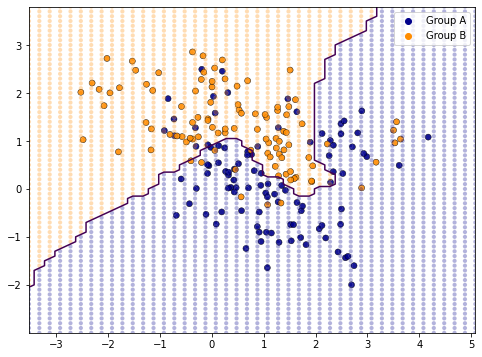

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers  因為y是類別所以轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))#hue代表色澤,當y=0時對應到groupa,當y=1時對應到groupb#palette代表色盤
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
    alpha = 0.9, edgecolor = 'black')
# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1#np.meshgrid:畫棋盤
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl),np.arange(y_min, y_max, 0.1)) # grid points: matrices #xx為圍棋盤上每一個點的x座標,yy為圍棋盤上每一個點的ｙ座標
z = np.zeros(xx.size) # a vector for KNN predictions
#找最近的鄰居
for i in range(xx.size) : #藉由這3036個點來畫地板  #xx.size為xx矩陣裡面元素總個數
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))#tile為複製#ravel為拉開#xx.ravel=x1(new),yy.ravel=x2(new)
    d=((tmp-X)**2).sum(axis=1)
    # d = np.linalg.norm(tmp - X, axis = 1) # n distances 
    idx = np.argsort(d) # sorting K distances#argsort可以對應回原本的位置而不是值
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values#idx[:k]表示在idx裡面挑前k個最近的距離。然後再對應回y的値
    # print(z[i])
# print(xx.size)  
# print(idx[:K])  
# print(y[idx[:K]])  
z = [0 if i < 0.5 else 1 for i in z]
# print(z)
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,markers = '.', palette = cmap_bold, hue = z, \
                alpha = 0.3, legend = False)#畫地板
Z = np.reshape(z, xx.shape) # reshape z to a matrix 
plt.contour(xx, yy, Z,[0.5])

KNN迴圈畫法

<AxesSubplot:>

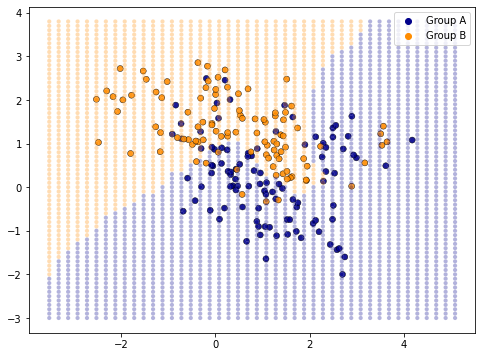

In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
        alpha = 0.9, edgecolor = 'black')
# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl),np.arange(y_min, y_max, 0.1)) # grid points: matrices #xx為圍棋盤上每一個點的x座標,yy為圍棋盤上每一個點的ｙ座標矩陣
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    # tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))#tile為複製#ravel為拉開#xx.ravel=x1(new),yy.ravel=x2(new)
    d=np.zeros(n)
    for j in range(n):
        x1=xx.ravel()[i]
        x2=yy.ravel()[i]
        d[j]=(x1-X[j,0])**2+(x2-X[j,1])**2
    # d=((tmp-X)**2).sum(axis=1)
    # d = np.linalg.norm(tmp - X, axis = 1) # n distances 
    idx = np.argsort(d) # sorting K distances#argsort可以對應回原本的位置而不是值
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
    
z = [0 if i < 0.5 else 1 for i in z]
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,\
        markers = '.', palette = cmap_bold, hue = z, \
                alpha = 0.3, legend = False)

立體圖峽谷呈現方式(用.py檔更適合)

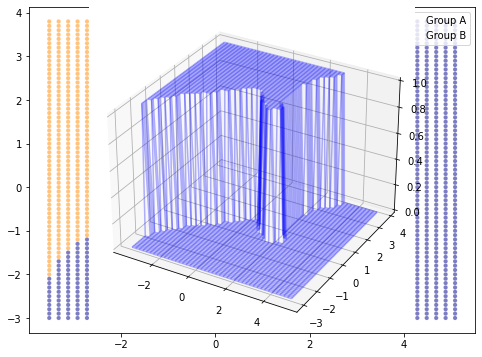

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
        alpha = 0.9, edgecolor = 'black')
# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl),np.arange(y_min, y_max, 0.1)) # grid points: matrices #xx為圍棋盤上每一個點的x座標,yy為圍棋盤上每一個點的ｙ座標矩陣
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))#tile為複製#ravel為拉開#xx.ravel=x1(new),yy.ravel=x2(new)
    # d=np.zeros(n)
    # for j in range(n):
    #     x1=xx.ravel()[i]
    #     x2=yy.ravel()[i]
    #     d[j]=(x1-X[j,0])**2+(x2-X[j,1])**2
    d=((tmp-X)**2).sum(axis=1)
    # d = np.linalg.norm(tmp - X, axis = 1) # n distances 
    idx = np.argsort(d) # sorting K distances#argsort可以對應回原本的位置而不是值
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
    
z = [0 if i < 0.5 else 1 for i in z]
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,\
        markers = '.', palette = cmap_bold, hue = z, \
                alpha = 0.3, legend = False)
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,markers = '.', palette = cmap_bold, hue = z, \
                alpha = 0.3, legend = False)#畫地板
Z = np.reshape(z, xx.shape) # reshape z to a matrix 
# plt.contour(xx, yy, Z,[0.5])
ax = plt.axes(projection = '3d')
ax.plot_wireframe(xx, yy, Z, color ='blue',
    alpha=0.3, rstride = 1, cstride = 1)
plt.show()

KNN套件法

Training error for KNN =0.1900


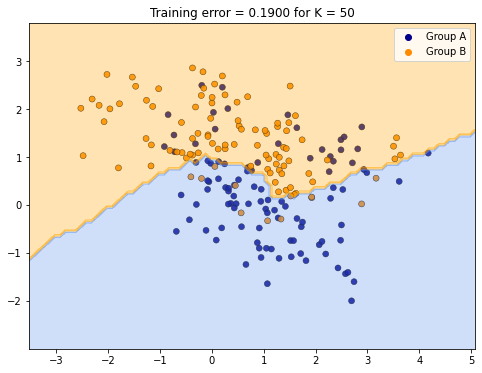

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
import matplotlib.colors as colors
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
        alpha = 0.9, edgecolor = 'black')
K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
    np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))
print('Training error for KNN ={:.4f}'.format(trainingErr))


In [18]:
def genmnlrvs(n1,n2,m1,m2,Cov1,Cov2): #生成資料的函數
    mvn1=multivariate_normal(mean=m1,cov=Cov1,seed=999976)
    mvn2=multivariate_normal(mean=m1,cov=Cov2,seed=564789)
    A,B=mvn1.rvs(n1),mvn2.rvs(n2)
    X=np.vstack((A,B))
    y=np.hstack((np.zeros(n1),np.ones(n2)))
    return X,y

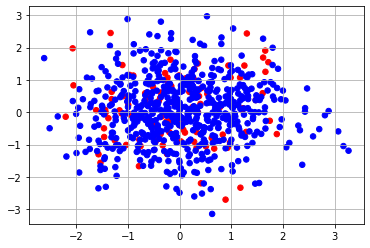

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

X,y=genmnlrvs(100,600,np.array([0, 0]), np.array([0, 0]),Cov1 = np.array([[1, 0], [0, 1]])\
 ,Cov2 = np.array([[1, 0], [0, 1]])) 
# n1, n2 = 200, 200
# m1, m2 = np.array([0, 0]), np.array([3, 2])
# Cov1 = np.array([[1, 0], [0, 1]])
# Cov2 = np.array([[1, 0], [0, 1]])
# mvn1 = multivariate_normal(mean = m1, cov = Cov1)
# mvn2 = multivariate_normal(mean = m2, cov = Cov2)
# A, B = mvn1.rvs(n1), mvn2.rvs(n2)
# X = np.vstack((A, B))

# y = np.hstack((np.zeros(n1), np.ones(n2)))

np.savetxt('1234455.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

accuracy in training for linear regression: 85.7143%
accuracy in training for Augmented linear regression: 85.7143%


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32184/1124054480.py:78: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')


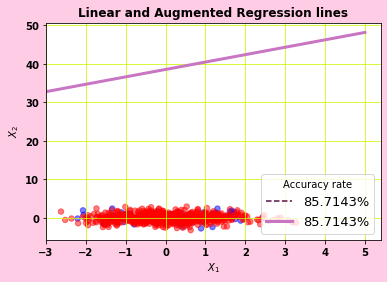

In [23]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
img_dir = '/Users/liang/Documents/統計數學與運算/images'
D = np.loadtxt( '/Users/liang/Documents/Github/1234455.txt')
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)
#-------------------------------------------

#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[np.ones(n),D[:,0:2]]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y.T
b3=LA.pinv(X2) @ y#如果b2裡面的反矩陣不存在，則可以用pseudo inverse 去估計,如果反矩陣存在的話，pseudo inverse會等於反矩陣 
# Draw a regression line

x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
z=ax.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
# plt.plot(x, f, lw=3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型---------------------------------------------------------
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$',weight='bold'), plt.ylabel('$X_2$',weight='heavy')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3, 4, 100)
yy = np.linspace(-2, 3, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
contours = plt.contour(X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))  
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=13)
# plt.savefig(img_dir+'hw4example.pdf', format='pdf')
plt.show()